# Beer Reviews

## Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
beer_reviews = pd.read_csv("data/beer_reviews.csv")

# Make a copy to work from
df = beer_reviews.copy()

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [5]:
# Count number of missing values
df.isna().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [6]:
# Drop missing values
df = df.dropna()
df.isna().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [7]:
# Display the various beer styles
df["beer_style"].unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'Russian Imperial Stout', 'American Amber / Red Ale',
       'American Strong Ale', 'Märzen / Oktoberfest',
       'American Adjunct Lager', 'American Blonde Ale', 'Euro Pale Lager',
       'English Brown Ale', 'Fruit / Vegetable Beer', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'American Double / Imperial Stout',
       'Doppelbock', 'American Stout', 'Maibock / Helles Bock',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Low Alcohol Beer', 'Extra Special / Strong Bitter (ESB)', 'Bock',
       'English India Pale Ale (IPA)', 'Altbier', 'Kölsch', 'Pumpkin Ale',
       

In [8]:
# Convert review_time from integer to datetime format
df['review_date'] = pd.to_datetime(df['review_time'], unit = 's' )
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_date
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,2009-02-16 20:57:03
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2009-03-01 13:44:57
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2009-03-01 14:10:04
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2009-02-15 19:12:25
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2010-12-30 18:53:26


In [9]:
# Drop duplicate reviews by user keeping most recent
df = df.sort_values('review_date', ascending=False)
df = df.drop_duplicates(subset= ['review_profilename','beer_beerid'], keep='first')
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_date
551371,22194,Flat Tail Brewing,1326285348,4.0,4.0,4.0,Rifugium,American Pale Ale (APA),4.0,4.0,Flat Tail Bourbon Pale,6.0,66257,2012-01-11 12:35:48
551392,22194,Flat Tail Brewing,1326284970,3.5,3.5,3.0,Rifugium,Kölsch,3.5,3.5,Tailgater,5.5,73600,2012-01-11 12:29:30
400524,694,Tröegs Brewing Company,1326276656,4.0,4.5,4.0,Lawl3ss,Oatmeal Stout,4.0,4.0,Tröegs Java Head Stout,7.5,52128,2012-01-11 10:10:56
1153730,454,Arcadia Brewing Company,1326275049,4.0,4.0,4.0,cquinn17,Scotch Ale / Wee Heavy,3.5,3.5,Arcadia Loch Down Scotch Ale,8.0,6384,2012-01-11 09:44:09
562035,423,Boulevard Brewing Co.,1326274454,4.5,4.0,4.0,libbey,Quadrupel (Quad),4.5,4.5,The Sixth Glass,10.5,39621,2012-01-11 09:34:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526516,45,Brooklyn Brewery,887155201,4.0,2.5,3.0,Todd,American Amber / Red Lager,3.5,3.5,Brooklyn Lager,5.2,148,1998-02-11 00:00:01
78405,140,Sierra Nevada Brewing Co.,886723201,4.5,4.0,4.0,BeerAdvocate,American Barleywine,4.0,4.5,Sierra Nevada Bigfoot Barleywine Style Ale,9.6,2671,1998-02-06 00:00:01
1417077,139,Shipyard Brewing Co.,885340801,4.0,3.5,3.0,BeerAdvocate,English Pale Ale,3.5,4.0,Tremont Ale,4.8,51,1998-01-21 00:00:01
764128,144,Sprecher Brewing Company,884649601,4.5,4.0,4.0,BeerAdvocate,Vienna Lager,4.0,4.0,Special Amber,5.0,97,1998-01-13 00:00:01


In [10]:
# Find average review for each beer

review_beers = df[["brewery_name","beer_name", "review_aroma", "review_appearance","review_palate", "review_taste", "review_overall"]]
review_beers = df.groupby(["brewery_name","beer_name", "beer_style"])["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"].mean()
review_beers = pd.DataFrame(data=review_beers).reset_index()

review_beers.sort_values(by=["review_overall"],ascending=False)

<ipython-input-10-521e150d6f66>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  review_beers = df.groupby(["brewery_name","beer_name", "beer_style"])["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"].mean()


,brewery_name,beer_name,beer_style,review_aroma,review_appearance,review_palate,review_taste,review_overall
22346,Herslev Bryghus,Høst Bryg Kirsebær,Fruit / Vegetable Beer,4.50,4.50,4.00,4.5,5.0
38036,Round Guys Brewing Company,BerlinerWeisster-WeissterBerliner,Berliner Weissbier,4.00,4.00,5.00,4.5,5.0
27700,Lunar Brewing,Blueberry Wit,Witbier,4.00,3.50,4.50,5.0,5.0
30938,Moosejaw Pizza & Dells Brewing Co.,Betty's Black Ale,Milk / Sweet Stout,5.00,5.00,4.50,5.0,5.0
1240,America's Brewpub,Triple 7 India Pale Ale,American IPA,4.50,5.00,4.00,4.0,5.0
...,...,...,...,...,...,...,...,...
40554,Solvang Brewing Company,Valhalla IPA,American Double / Imperial IPA,1.00,3.00,1.50,1.5,1.0
282,AMB - Maître Brasseur,L'Abord-À-Plouffe,Hefeweizen,1.50,2.00,1.00,1.5,1.0
35872,Pub Dog Brewing,Belgian Red,Flanders Red Ale,2.00,3.00,1.00,1.0,1.0
40550,Solvang Brewing Company,Great Dane Pale Ale,American Pale Ale (APA),2.00,3.00,2.00,1.0,1.0


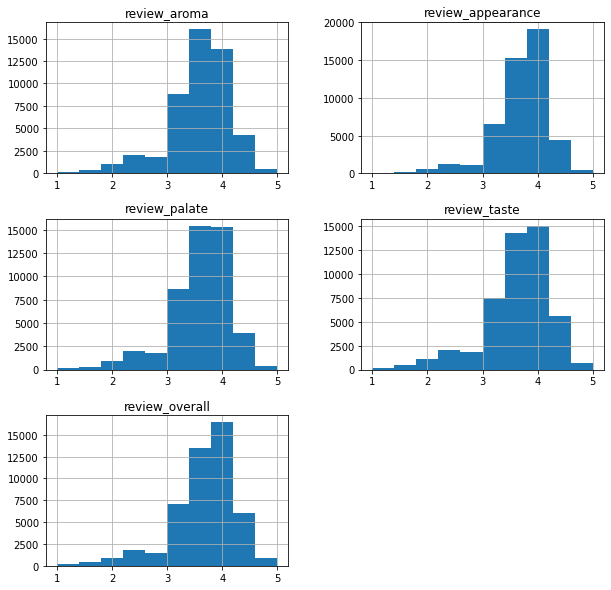

In [11]:
# Distribution of types of reviews. We can see that they all have generally the same shape.
review_beers.hist(figsize=(10,10))
plt.show()

In [12]:
# Find average review for each brewery
review_breweries = df[["brewery_name","beer_name", "review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"]]
review_breweries = df.groupby(["brewery_name"])["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"].mean()
review_breweries = pd.DataFrame(data=review_breweries).reset_index()

review_breweries.sort_values(by=["review_overall"],ascending=False)

<ipython-input-12-90236c296027>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  review_breweries = df.groupby(["brewery_name"])["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"].mean()


,brewery_name,review_aroma,review_appearance,review_palate,review_taste,review_overall
4081,Round Guys Brewing Company,4.00,4.00,5.00,4.50,5.0
1862,Edsten Brewing Company,4.75,5.00,5.00,4.75,5.0
1959,Facer's Flintshire Brewery,4.00,4.00,4.00,4.00,5.0
2527,"Hosokawa Sake Brewing Co., Ltd.",3.75,3.75,3.75,4.00,5.0
933,Brauerei Gundel,4.50,5.00,5.00,4.50,5.0
...,...,...,...,...,...,...
2313,Hakodate Beer,2.00,3.00,3.00,2.00,1.0
546,Bières De Carcassonne,1.00,1.00,1.00,1.00,1.0
2699,Jyohana Beer,1.00,3.00,1.00,1.50,1.0
3976,Red Dot Brewhouse,1.00,2.00,1.00,1.00,1.0


In [13]:
# Find average review for each beer style
review_style = df[["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"]]
review_style = df.groupby(["beer_style"])["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"].mean()
review_style = pd.DataFrame(data=review_style).reset_index()

review_style.sort_values(by=["review_overall"],ascending=False)

<ipython-input-13-3e13237fa363>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  review_style = df.groupby(["beer_style"])["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"].mean()


,beer_style,review_aroma,review_appearance,review_palate,review_taste,review_overall
20,American Wild Ale,4.132777,4.009892,4.045484,4.158867,4.098888
63,Gueuze,4.115339,4.037203,4.049322,4.126102,4.086356
86,Quadrupel (Quad),4.133361,4.119748,4.126835,4.212297,4.073221
75,Lambic - Unblended,4.125725,3.918279,3.969536,4.133462,4.061896
11,American Double / Imperial Stout,4.158892,4.162583,4.097189,4.185534,4.028336
...,...,...,...,...,...,...
64,Happoshu,2.597046,2.919831,2.744726,2.647679,2.913502
54,Euro Strong Lager,2.870007,3.227626,2.966716,2.823964,2.861317
76,Light Lager,2.145285,2.407073,2.317131,2.248546,2.685089
13,American Malt Liquor,2.412803,2.836802,2.651870,2.538330,2.677160


## Weirdest Beers

My first task is to find the "weirdest" beers. I am defining weird as unexpected which may be a positive or negative. To find this in the data I am looking for which beers have the largest difference between their taste review and their overall review.

In [14]:
# Find beers that vary significantly from their taste review to their overall review
weird_beers = review_beers["beer_name"]
weird_beers = pd.DataFrame(data=weird_beers)
weird_beers["brewery_name"] = review_beers["brewery_name"]
weird_beers["taste_irrelevance_ratio"] = (review_beers['review_overall'] - review_beers['review_taste'])
weird_beers['weirdness'] = weird_beers['taste_irrelevance_ratio'].abs()
weird_beers.sort_values(by=["weirdness"],ascending=False)

,beer_name,brewery_name,taste_irrelevance_ratio,weirdness
24103,Hot And Sour Szechuan Ale,Ithaca Beer Company,-3.5,3.5
48304,Liq Natural 10P,Yanjing Pijiu (Guilin Liquan) Gufen Youxian Go...,3.0,3.0
32029,Je Ne Sais Quad,Newport Beach Brewing Company,-2.5,2.5
34105,Ozzobír,Pardubický pivovar a.s.,2.5,2.5
41614,Durty's Brew,Stingray Brewery,2.0,2.0
...,...,...,...,...
25092,Herzog Von Bavaria,Kazbegi-Castel Lilo Brewery,0.0,0.0
25091,Topadze Lager,Kazbegi JSC,0.0,0.0
25090,Tbilisi Beer,Kazbegi JSC,0.0,0.0
25081,Kauzen Bock,Kauzen Bräu,0.0,0.0


The weirdest beers are:
* Hot And Sour Szechuan Ale by Ithaca Beer Company
* Liq Nautral 10p by Yanjing Pijiu (Guilin Liquan)
* Je Ne Sais Quad by Newport Beach Brewing Company
* Ozzobír by Pardubický pivovar a.s.

These are the four beers with the greatest difference between how reviewers said that they tasted and how they rated them overall.

## Choosing three beers to recommend

I am now looking at the data to decide which beers I would choose to recommend to a friend. While highest reviewed would be the typical criteria one would base their recommendation on, I am basing my recommendation on which beers most exceeded the average rating of their particular style.

In [15]:
# Find beer styles that have higher overall reviews than their taste review
review_style["taste_irrelevance"] = (review_style['review_overall'] - review_style['review_taste'])
review_style.sort_values(by=["taste_irrelevance"],ascending=False)

,beer_style,review_aroma,review_appearance,review_palate,review_taste,review_overall,taste_irrelevance
76,Light Lager,2.145285,2.407073,2.317131,2.248546,2.685089,0.436543
1,American Adjunct Lager,2.477454,2.785141,2.735355,2.684307,3.006762,0.322455
69,Japanese Rice Lager,2.649048,2.994747,2.916284,2.846356,3.119173,0.272817
64,Happoshu,2.597046,2.919831,2.744726,2.647679,2.913502,0.265823
73,Kölsch,3.393701,3.564935,3.588961,3.549610,3.795909,0.246299
...,...,...,...,...,...,...,...
84,Old Ale,4.008505,3.942616,3.945011,4.057037,3.898841,-0.158196
19,American Strong Ale,3.979762,4.028344,3.956397,4.033564,3.872784,-0.160780
101,Wheatwine,3.976131,3.906756,3.946538,3.983808,3.818956,-0.164852
34,Chile Beer,3.280383,3.341148,3.257416,3.296890,3.107895,-0.188995


In [16]:
outliers = review_beers["beer_name"]
outliers = pd.DataFrame(data=outliers)
outliers["brewery_name"] = review_beers["brewery_name"]
outliers["beer_style"] = review_beers["beer_style"]
outliers["beer_review"] = review_beers["review_overall"]
outliers["style_review"] = review_style["review_overall"]
outliers["full_name"] = outliers["brewery_name"] + " " + outliers["beer_name"]

outliers

,beer_name,brewery_name,beer_style,beer_review,style_review,full_name
0,Blondelle,'t Hofbrouwerijke,Belgian Strong Pale Ale,4.000000,3.830592,'t Hofbrouwerijke Blondelle
1,Bosprotter,'t Hofbrouwerijke,Tripel,3.722222,3.006762,'t Hofbrouwerijke Bosprotter
2,Hof Korvatunturi,'t Hofbrouwerijke,Old Ale,3.750000,3.800632,'t Hofbrouwerijke Hof Korvatunturi
3,Hofblues,'t Hofbrouwerijke,Belgian Dark Ale,3.812500,3.572899,'t Hofbrouwerijke Hofblues
4,Hofdraak,'t Hofbrouwerijke,Belgian Dark Ale,3.357143,3.898026,'t Hofbrouwerijke Hofdraak
...,...,...,...,...,...,...
48827,Nutty Nut Brown Ale,Ørbæk Bryggeri,English Brown Ale,3.500000,NaN,Ørbæk Bryggeri Nutty Nut Brown Ale
48828,Old Danish Braggot,Ørbæk Bryggeri,Braggot,3.666667,NaN,Ørbæk Bryggeri Old Danish Braggot
48829,Pale Ale,Ørbæk Bryggeri,American Pale Ale (APA),4.250000,NaN,Ørbæk Bryggeri Pale Ale
48830,WeissBier Hyldeblomst,Ørbæk Bryggeri,Hefeweizen,3.500000,NaN,Ørbæk Bryggeri WeissBier Hyldeblomst


In [17]:
outliers["higher_than_avg"] = (outliers["beer_review"]-outliers["style_review"])/outliers["beer_review"] * 100
sorted_outliers = outliers.sort_values(by=["higher_than_avg"],ascending=False)
sorted_outliers

,beer_name,brewery_name,beer_style,beer_review,style_review,full_name,higher_than_avg
64,Baby Horse,21st Amendment Brewery,Quadrupel (Quad),4.500000,2.913502,21st Amendment Brewery Baby Horse,35.255509
77,Friday IPA,21st Amendment Brewery,American IPA,3.750000,2.550639,21st Amendment Brewery Friday IPA,31.982956
13,(512) ONE,(512) Brewing Company,Belgian Strong Dark Ale,3.730769,2.677160,(512) Brewing Company (512) ONE,28.241068
54,21st Amendment IPA,21st Amendment Brewery,American IPA,3.888372,2.861317,21st Amendment Brewery 21st Amendment IPA,26.413509
34,NZ Victory Hop Devil IPA,1516 Brewing Company,American IPA,4.150000,3.107895,1516 Brewing Company NZ Victory Hop Devil IPA,25.110970
...,...,...,...,...,...,...,...
48827,Nutty Nut Brown Ale,Ørbæk Bryggeri,English Brown Ale,3.500000,NaN,Ørbæk Bryggeri Nutty Nut Brown Ale,NaN
48828,Old Danish Braggot,Ørbæk Bryggeri,Braggot,3.666667,NaN,Ørbæk Bryggeri Old Danish Braggot,NaN
48829,Pale Ale,Ørbæk Bryggeri,American Pale Ale (APA),4.250000,NaN,Ørbæk Bryggeri Pale Ale,NaN
48830,WeissBier Hyldeblomst,Ørbæk Bryggeri,Hefeweizen,3.500000,NaN,Ørbæk Bryggeri WeissBier Hyldeblomst,NaN


In [18]:
top_10 = sorted_outliers.head(10)
top_10

,beer_name,brewery_name,beer_style,beer_review,style_review,full_name,higher_than_avg
64,Baby Horse,21st Amendment Brewery,Quadrupel (Quad),4.500000,2.913502,21st Amendment Brewery Baby Horse,35.255509
77,Friday IPA,21st Amendment Brewery,American IPA,3.750000,2.550639,21st Amendment Brewery Friday IPA,31.982956
13,(512) ONE,(512) Brewing Company,Belgian Strong Dark Ale,3.730769,2.677160,(512) Brewing Company (512) ONE,28.241068
54,21st Amendment IPA,21st Amendment Brewery,American IPA,3.888372,2.861317,21st Amendment Brewery 21st Amendment IPA,26.413509
34,NZ Victory Hop Devil IPA,1516 Brewing Company,American IPA,4.150000,3.107895,1516 Brewing Company NZ Victory Hop Devil IPA,25.110970
69,Bitter American,21st Amendment Brewery,American Pale Ale (APA),4.123333,3.119173,21st Amendment Brewery Bitter American,24.353128
76,Frico Neccia,21st Amendment Brewery,American Pale Ale (APA),3.500000,2.685089,21st Amendment Brewery Frico Neccia,23.283177
53,21 Rock,21st Amendment Brewery,American Double / Imperial IPA,4.000000,3.204138,21st Amendment Brewery 21 Rock,19.896548
6,Hoftrol,'t Hofbrouwerijke,Belgian Dark Ale,4.500000,3.607299,'t Hofbrouwerijke Hoftrol,19.837797
1,Bosprotter,'t Hofbrouwerijke,Tripel,3.722222,3.006762,'t Hofbrouwerijke Bosprotter,19.221320


<ipython-input-19-19707fa83dbb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


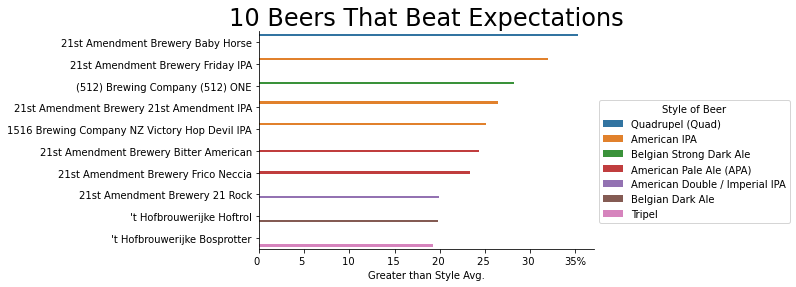

In [19]:
ax = sns.barplot(y="full_name",x="higher_than_avg", hue="beer_style", data=top_10, palette="tab10")
ax.set_title("10 Beers That Beat Expectations",fontsize=24)
plt.xlabel("Greater than Style Avg.")
plt.ylabel("")
labels = ("0 ", "5 ", "10 ", "15 ", "20 ", "25 ", "30 ", "35%")
ax.set_xticklabels(labels)
plt.legend(title = "Style of Beer",
bbox_to_anchor = (1.6, 0.4),
loc="right")
sns.despine()

Based on the above chart the three beers that I would choose to recommend to a friend are:

1. Baby Horse by 21st Amendment Brewery
2. Friday IPA by 21st Amendment Brewery
3. ONE by (512) Brewing Company

These are the three beers that outperform the average rating for their style of beer the most.